# K Means Clustering for Credit Card Customers

## Introduction

In this project, I will use K Means Clustering to segment credit card customers based on their demographic data. K Means Clustering is an unsupervised machine learning method that is useful in customer segmentation. It divides the data points into non-overlapping clusters without any cluster-internal structure. Data points within each cluster are very similar. We should specify the number of clusters, which is K, and use parameters to find the best K.

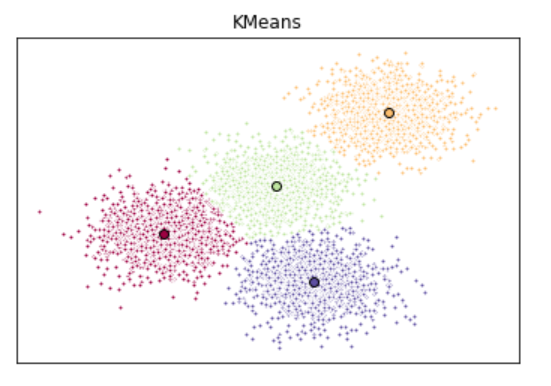

**What is the best K and how to find it?**<ol>The best K should allow the algorithem to minimize the distance between data points within each cluster, while maximize the distance between then centroids of each cluster. In other words, try to increase the homogeneity of each cluster and seperate the clusters.</ol> <ol> The accuracy of K Means clustering can be measure by calculating the average distance between data points within the same cluster, namely SSE or distortion.</ol>

To find the best K, we can plot the mean distance of data points to cluster centroid in the Y-axis, and the number of clusters (K) in the X-axis. See the sample plot below.

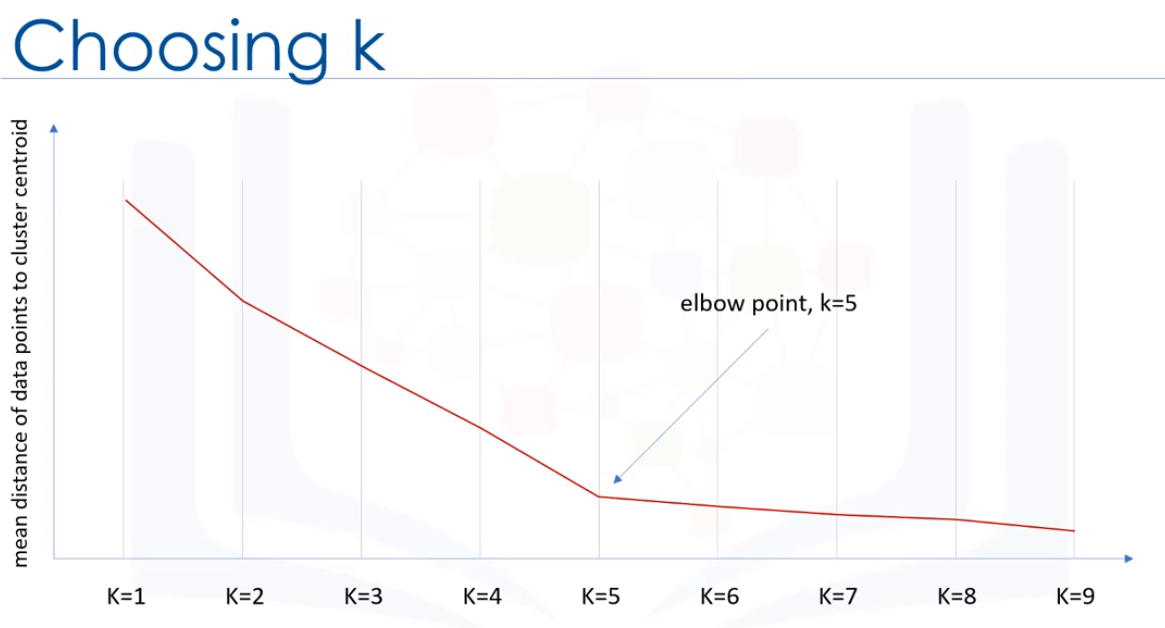

Essentily, the accuracy will increase since the number of K increases. However, greater is not always better. We determine the best K by the elbow point, where the rate of decrease sharply shifts. I will introduce two more metrics in evaluation.

## Table of Contents

1. Preparation and Variable Description
2. Understand the data
3. Pre-processing
4. Modle Setting-up
5. Evaluation and Visualization Using Eblow Method
<ol>- By SSE</ol>
<ol>- By Silhouette</ol>
<ol>- By calinski_harabaz Score</ol>
<ol>- 3D Plot</ol>
6. Interpretation

### Preparation

In [1]:
#import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#load data
df=pd.read_csv('E:\Data Science\Course 8 Machine Learning\Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
#the shape of the data
df.shape

(850, 10)

This dataset has 850 observations and 10 variables.

### Understand the data

In [4]:
#variable names
df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [5]:
#every variable is read in the right type
#get the summary stats of numeric variables
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


### Pre-processing

In [6]:
#discard the "Address" variable because it's object and not useful for our model
df.drop('Address',axis=1,inplace=True)

In [7]:
df.shape

(850, 9)

In [8]:
#standardize beacuse variables are not in the same measurement scale
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
clus = StandardScaler().fit_transform(X)
clus

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Model Setting-up

In [9]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

- init: initialization method of the centroids
<ol>k-means++: selects initial cluster centers for k-means clustering in a smart way to speed up convergence.</ol>
- n_clusters: the number of clusters to form as well as the number of centroids to generate.
- n_init: the number of times the k-means algorithm will be run with different centroid seeds. 

In [10]:
#fit the model
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
#get labels of each data point
df['labels']=k_means.labels_
k_means_labels = k_means.labels_

In [12]:
k_means_labels

array([0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,

In [13]:
#the coordinates of the cluster centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[3.29645609e+01, 1.61479199e+00, 6.37442219e+00, 3.11648690e+01,
        1.03254083e+00, 2.10413251e+00, 2.37288136e-01, 1.00947612e+01],
       [4.53888889e+01, 2.66666667e+00, 1.95555556e+01, 2.27166667e+02,
        5.67844444e+00, 1.09071667e+01, 2.22222222e-01, 7.32222222e+00],
       [4.13333333e+01, 1.95628415e+00, 1.52568306e+01, 8.39289617e+01,
        3.10363934e+00, 5.76527869e+00, 1.36612022e-01, 1.07245902e+01]])

In [14]:
#check the centroid values
df.groupby('labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
labels,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


### Evaluation and Visualization using Elbow Method

The algorithm decides K=3 is the best number of clusters. Let's see why.

#### By SSE

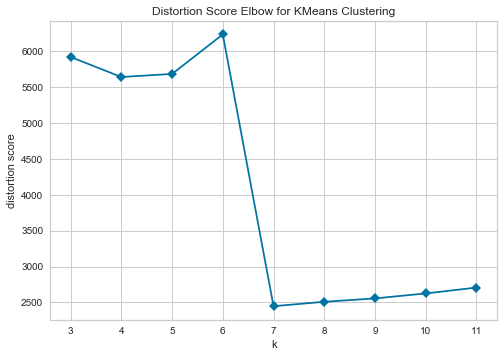

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
#you may install yellowbrick in your environment first
#!pip install yellowbrick

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(k_means, k=(3,12), timings=False)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

The Y-axis is the distortion score, which computes the sum of squared distances from each point to its assigned center. The smaller the better. It seems that 7 is the optimal number in this plot.

#### By Silhouette Score

http://https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score
<ol>The link provides explaination of Silhouette Score. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is (2 <= n_labels <= n_samples - 1). The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar. This is particularly useful for determining cluster imbalance, or for selecting a value for K by comparing multiple visualizers.

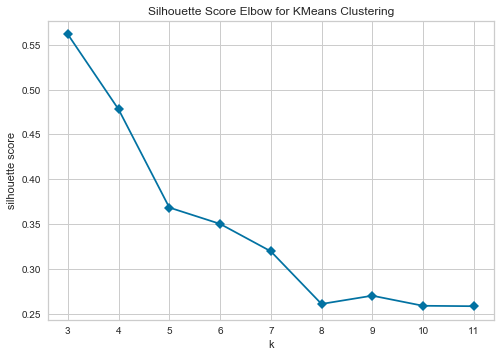

In [16]:
visualizer = KElbowVisualizer(k_means, k=(3,12), metric='silhouette',timings=False)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

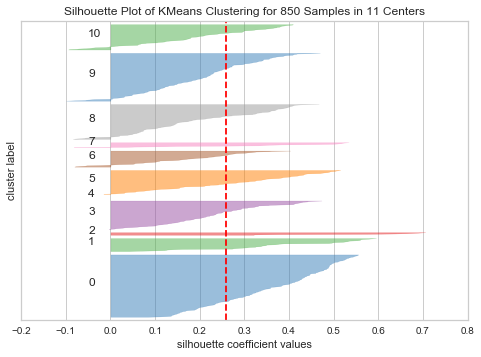

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(k_means,timings=False)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()

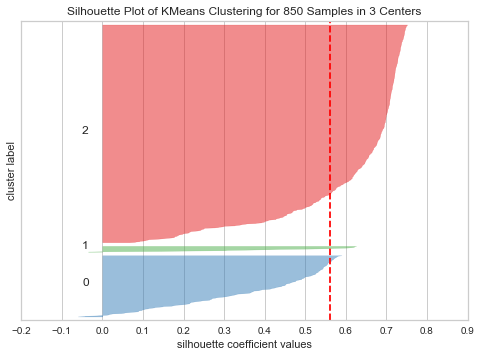

In [18]:
#how the optimal number (3) improves the Silhouette score
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 3)
visualizer = SilhouetteVisualizer(k_means3,timings=False)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()

the vertical red-dotted line on the plot indicates the average silhouette score for all observations.When we define K=3, the width of cluster#1 (label 0) and cluster#2 (label 1) increase, and their sihouette score increase as well. This is because  the width of each silhouette is proportional to the number of samples assigned to the cluster.

#### By calinski_harabaz Score

The calinski_harabaz score computes the ratio of dispersion between and within clusters. Higher Calinski-Harabaz score relates to a model with better defined clusters. For more information, see <ol>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabaz_score.html#sklearn.metrics.calinski_harabaz_score

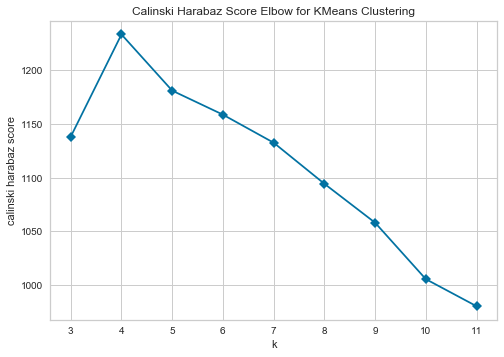

In [19]:
visualizer = KElbowVisualizer(k_means, k=(3,12), metric='calinski_harabaz',timings=False)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

The Calinski Harabaz Score plot also suggests that **3** is the optimal number of clusters.

#### 3D Visualization of Clusters

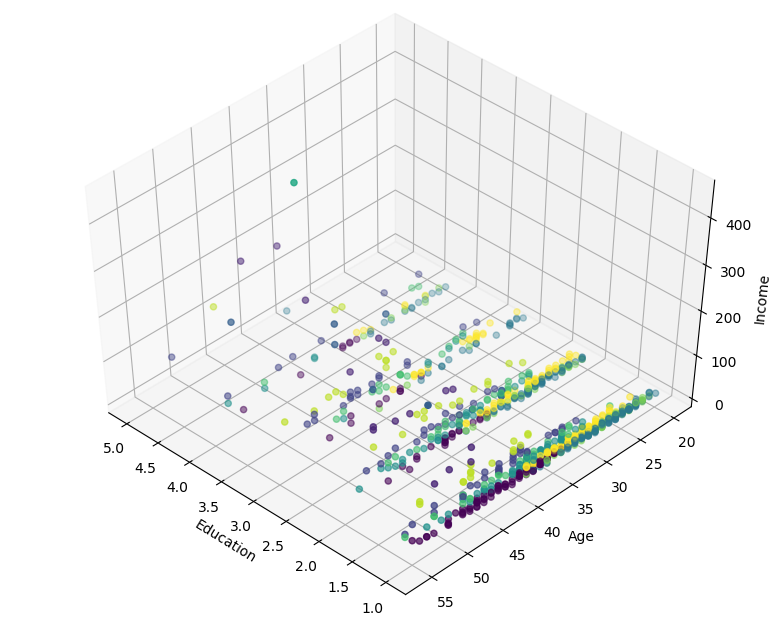

In [171]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')


ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

## Interpretation

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME